In [2]:
import numpy as np
import os
import mmcv
import importlib
import torch
import torchvision.transforms as transforms
from mmcv import Config
from mmcls.datasets.pipelines import Compose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [35]:
configSeg = 'segmentation/ocrnet_hr48_512x512_carparts_noflip/ocrnet_hr48_512x512_carparts_noflip.py'
checkpointSeg = 'segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth'
imgRoot = 'data/CompCars_sv_original_split/train'
configCAM = 'CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py'
checkpointCAM = 'CAMModels/resnet/compCars_Original/latest.pth'
imgPath = os.path.join(imgRoot,'Acura_Acura_ILX_2a6cce617fc27d.jpg')
annfile = 'annfile.txt'

In [44]:
IMAGE_TRANSFORMS = {'Resize':'size', 'CenterCrop':'crop_size'}

In [26]:
def get_transform_instance(cls):
    m = __import__('torchvision')
    m = getattr(m, 'transforms')
    m = getattr(m, cls)
    return m

In [98]:
def get_pipeline_from_config_pipeline(pipeline, img_transforms = IMAGE_TRANSFORMS, tensorize=True, convertToPIL=True, transpose=True):
    components = []
    if convertToPIL:
        components.append(transforms.ToPILImage())
    for step in pipeline:
        if step['type'] in img_transforms.keys():
            transform = get_transform_instance(step['type'])
            param = step[img_transforms[step['type']]]
            if isinstance(param,tuple) and param[-1]==-1:
                param = param[:-1]
            components.append(transform(param))
    if tensorize:
        components.append(transforms.ToTensor())
    if transpose:
        components.append(transforms.Lambda(lambda x: np.transpose(x,(1,2,0))))
    return transforms.Compose(components)

In [36]:
cfg = Config.fromfile(configCAM)

In [37]:
cfg.data.test

{'type': 'CompCars',
 'data_prefix': 'data/CompCars_sv_original_split/val',
 'ann_file': 'data/CompCars_sv_original_split/meta/val.txt',
 'pipeline': [{'type': 'LoadImageFromFile'},
  {'type': 'Resize', 'size': (256, -1)},
  {'type': 'CenterCrop', 'crop_size': 224},
  {'type': 'Normalize',
   'mean': [123.675, 116.28, 103.53],
   'std': [58.395, 57.12, 57.375],
   'to_rgb': True},
  {'type': 'ImageToTensor', 'keys': ['img']},
  {'type': 'Collect', 'keys': ['img']}]}

In [99]:
pipeline = get_pipeline_from_config_pipeline(cfg.data.test.pipeline)

In [81]:
i = Image.open(imgPath)

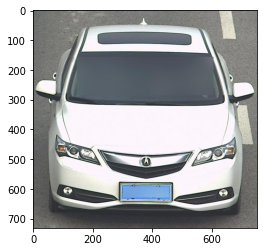

In [82]:
plt.imshow(i)

In [83]:
j = pipeline(i)

In [80]:
j.shape

torch.Size([3, 256, 263])

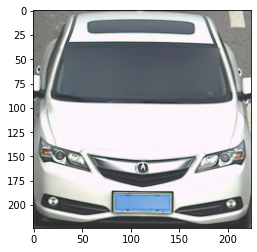

In [84]:
plt.imshow(np.transpose(j,(1,2,0)))

In [100]:
k = mmcv.imread(imgPath)
l = Image.fromarray(k)

In [102]:
e = pipeline(k)

In [95]:
pipeline

Compose(
    ToPILImage()
    Resize(size=(256,), interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
)

In [103]:
e.shape

torch.Size([224, 224, 3])